# 🎵 Apple Music Stream Data Analysis

In this project, we are going to explore my personal music streaming data from Apple Music. Apple Music is a music and video streaming service developed by Apple Inc. The dataset used here showcases my personal streaming on the platform. 

We can see many things in the dataset like

- List of songs played
- List of Singers/Artists
- Start time and position of songs
- Music Labels

and much more. 

I got this data from Apple's privacy website.

![Picture title](aplle-music.jpeg)

## Requesting and downloading data

Follow these steps request your personal data from apple
- Go to privacy.apple.com
- Log in to your account
- Click on **Request a copy of your data**
- Be sure to check mark on **Apple Media Services Information** and click on continue at bottom
- Choose default size and click on **Complete Request**

Check the below screenshots for reference

![Picture title](image-20210605-194813.png)

![Picture title](image-20210605-194845.png)

![Picture title](image-20210605-194900.png)

## Data Preparation and cleaning


Steps:-

1. Load the dataset (csv file)
2. Check for shape and columns of dataframe
3. Check for missing values
4. Check the basic statistics of columns


In [1]:
file_path = '/work/Apple Music Play Activity.csv'

In [2]:
# Install plotly express if not already installed
!pip install plotly_express --quiet

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

pd.set_option('display.max_columns', None)

In [4]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 12, 8

In [5]:
music_df = pd.read_csv(file_path)

In [6]:
music_df.head()

,Apple Id Number,Apple Music Subscription,Artist Name,Build Version,Client IP Address,Content Name,Content Provider,Content Specific Type,Device Identifier,End Position In Milliseconds,End Reason Type,Event End Timestamp,Event Reason Hint Type,Event Received Timestamp,Event Start Timestamp,Event Type,Feature Name,Genre,Item Type,Media Duration In Milliseconds,Media Type,Metrics Bucket Id,Metrics Client Id,Milliseconds Since Play,Offline,Original Title,Play Duration Milliseconds,Provided Audio Bit Depth,Provided Audio Channel,Provided Audio Sample Rate,Provided Bit Rate,Provided Codec,Provided Playback Format,Source Type,Start Position In Milliseconds,Store Country Name,Targeted Audio Bit Depth,Targeted Audio Channel,Targeted Audio Sample Rate,Targeted Bit Rate,Targeted Codec,Targeted Playback Format,User’s Audio Quality,User’s Playback Format,UTC Offset In Seconds
0,11569060994,True,Bazzi,"Music/3.1 iOS/13.0 model/iPhone9,3 hwp/t8010 b...",106.66.247.0,Paradise,The Warner Music Group,Song,f625ff5caca143772ec5bb7962ef7f5f9267f36a,3312.0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,2019-06-28T16:46:33.382Z,NOT_SPECIFIED,2019-06-28T17:21:01.944Z,2019-06-28T16:46:30.070Z,PLAY_END,library / downloaded_music / songs,Pop,ITUNES_STORE_CONTENT,169087.0,AUDIO,7044.0,3z44Gmyhz4lXz4xCzBqJzr9hlFsSr,2068562,True,NaN,3312.0,NaN,NaN,NaN,NaN,NaN,NaN,ORIGINATING_DEVICE,0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19800
1,11569060994,True,Raftaar,Music/1.0 macOS/10.15 build/19A582a model/MacB...,117.206.166.3,Aage Chal,Hungama Digital Media Entertainment Pvt.,Song,1C36BB164346,131214.0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,2020-06-18T15:29:01.975Z,NOT_SPECIFIED,2020-06-21T04:13:37.975Z,2020-06-18T15:26:50.761Z,PLAY_END,library,Indian Pop,ITUNES_STORE_CONTENT,229800.0,AUDIO,3331.0,3z4uZCHNzEVrz4vkzAsJzGurr2k8E,218676000,False,NaN,131214.0,NaN,NaN,NaN,NaN,NaN,NaN,ORIGINATING_DEVICE,0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19800
2,11569060994,True,"Master Rakesh, Dr Zeus","Music/3.1 iOS/13.0 model/iPhone9,3 hwp/t8010 b...",117.228.170.82,Kangna (feat. Deepti & Shortie),The Orchard Enterprises Inc.,Song,f625ff5caca143772ec5bb7962ef7f5f9267f36a,0.0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,2019-08-27T13:22:00.883Z,NOT_SPECIFIED,2019-08-27T13:22:05.551Z,2019-08-27T13:22:00.883Z,PLAY_END,library / album_detail,Asia,ITUNES_STORE_CONTENT,209118.0,AUDIO,7044.0,3z44Gmyhz4lXz4xCzBqJzr9hlFsSr,4668,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ORIGINATING_DEVICE,0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19800
3,11569060994,True,The Weeknd,"Music/3.1 iOS/11.3 model/iPhone9,3 hwp/t8010 b...",106.77.1.155,Can't Feel My Face,Universal Music International,Song,f625ff5caca143772ec5bb7962ef7f5f9267f36a,31027.0,SCRUB_BEGIN,2018-04-03T18:15:01.395Z,NOT_SPECIFIED,2018-04-03T18:15:14.359Z,2018-04-03T18:15:00.362Z,PLAY_END,library / downloaded_music / songs,R&B/Soul,ITUNES_STORE_CONTENT,213577.0,AUDIO,4877.0,3z4pGutFz1mxz4yYz9qazYSewotZt,12964,False,NaN,1033.0,NaN,NaN,NaN,NaN,NaN,NaN,ORIGINATING_DEVICE,29994,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19800
4,11569060994,True,"Nucleya, DIVINE","Music/3.1 iOS/11.2 model/iPhone9,3 hwp/t8010 b...",42.106.57.192,"Paintra (From ""Mukkabaaz"")",Eros International USA Inc,Song,f625ff5caca143772ec5bb7962ef7f5f9267f36a,119958.0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,2017-12-20T12:42:47.599Z,NOT_SPECIFIED,2017-12-20T12:42:47.771Z,2017-12-20T12:41:25.722Z,PLAY_END,library / album_detail,Bollywood,ITUNES_STORE_CONTENT,232222.0,AUDIO,4877.0,3z4pGutFz1mxz4yYz9qazYSewotZt,172,False,NaN,81877.0,NaN,NaN,NaN,NaN,NaN,NaN,ORIGINATING_DEVICE,38081,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19800


In [7]:
print("Rows x Columns: {}".format(music_df.shape))

Rows x Columns: (21147, 45)


In [8]:
# check for available columns
music_df.columns.to_list()

['Apple Id Number',
 'Apple Music Subscription',
 'Artist Name',
 'Build Version',
 'Client IP Address',
 'Content Name',
 'Content Provider',
 'Content Specific Type',
 'Device Identifier',
 'End Position In Milliseconds',
 'End Reason Type',
 'Event End Timestamp',
 'Event Reason Hint Type',
 'Event Received Timestamp',
 'Event Start Timestamp',
 'Event Type',
 'Feature Name',
 'Genre',
 'Item Type',
 'Media Duration In Milliseconds',
 'Media Type',
 'Metrics Bucket Id',
 'Metrics Client Id',
 'Milliseconds Since Play',
 'Offline',
 'Original Title',
 'Play Duration Milliseconds',
 'Provided Audio Bit Depth',
 'Provided Audio Channel',
 'Provided Audio Sample Rate',
 'Provided Bit Rate',
 'Provided Codec',
 'Provided Playback Format',
 'Source Type',
 'Start Position In Milliseconds',
 'Store Country Name',
 'Targeted Audio Bit Depth',
 'Targeted Audio Channel',
 'Targeted Audio Sample Rate',
 'Targeted Bit Rate',
 'Targeted Codec',
 'Targeted Playback Format',
 'User’s Audio Quality

display basic statistics of numerical variables

In [9]:
music_df.describe()

,Apple Id Number,End Position In Milliseconds,Media Duration In Milliseconds,Metrics Bucket Id,Milliseconds Since Play,Original Title,Play Duration Milliseconds,Provided Audio Bit Depth,Provided Audio Channel,Provided Audio Sample Rate,Provided Bit Rate,Provided Codec,Provided Playback Format,Start Position In Milliseconds,Targeted Audio Bit Depth,Targeted Audio Channel,Targeted Audio Sample Rate,Targeted Bit Rate,Targeted Codec,Targeted Playback Format,User’s Audio Quality,User’s Playback Format,UTC Offset In Seconds
count,2.114700e+04,2.107200e+04,2.106000e+04,21064.000000,2.114700e+04,0.0,2.107200e+04,0.0,0.0,0.0,0.0,0.0,0.0,21147.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.114700e+04
mean,1.156906e+10,8.300543e+04,2.124895e+05,4497.517471,1.992058e+07,NaN,6.995704e+04,NaN,NaN,NaN,NaN,NaN,NaN,13033.490944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.429531e+05
std,0.000000e+00,9.300075e+04,8.434837e+04,1638.409480,1.399541e+08,NaN,9.254479e+04,NaN,NaN,NaN,NaN,NaN,NaN,38730.152100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.172509e+06
min,1.156906e+10,0.000000e+00,0.000000e+00,605.000000,0.000000e+00,NaN,-2.860600e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.520000e+04
25%,1.156906e+10,1.633750e+03,1.880350e+05,3077.000000,2.700000e+02,NaN,9.250000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.980000e+04
50%,1.156906e+10,4.452600e+04,2.106395e+05,4877.000000,2.948300e+04,NaN,1.936650e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.980000e+04
75%,1.156906e+10,1.646848e+05,2.379780e+05,4877.000000,1.600267e+06,NaN,1.449298e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.980000e+04
max,1.156906e+10,2.969055e+06,2.969055e+06,9019.000000,4.067912e+09,NaN,2.969055e+06,NaN,NaN,NaN,NaN,NaN,NaN,687689.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.980000e+07


In [10]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21147 entries, 0 to 21146
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Apple Id Number                 21147 non-null  int64  
 1   Apple Music Subscription        21147 non-null  bool   
 2   Artist Name                     21084 non-null  object 
 3   Build Version                   21119 non-null  object 
 4   Client IP Address               20795 non-null  object 
 5   Content Name                    21091 non-null  object 
 6   Content Provider                21072 non-null  object 
 7   Content Specific Type           21088 non-null  object 
 8   Device Identifier               21064 non-null  object 
 9   End Position In Milliseconds    21072 non-null  float64
 10  End Reason Type                 20138 non-null  object 
 11  Event End Timestamp             21072 non-null  object 
 12  Event Reason Hint Type          

Check for the no. of missing values in each column

In [11]:
music_df.isnull().sum()

Apple Id Number                       0
Apple Music Subscription              0
Artist Name                          63
Build Version                        28
Client IP Address                   352
Content Name                         56
Content Provider                     75
Content Specific Type                59
Device Identifier                    83
End Position In Milliseconds         75
End Reason Type                    1009
Event End Timestamp                  75
Event Reason Hint Type                0
Event Received Timestamp              0
Event Start Timestamp               592
Event Type                            0
Feature Name                       2237
Genre                                75
Item Type                             0
Media Duration In Milliseconds       87
Media Type                            1
Metrics Bucket Id                    83
Metrics Client Id                    83
Milliseconds Since Play               0
Offline                               0


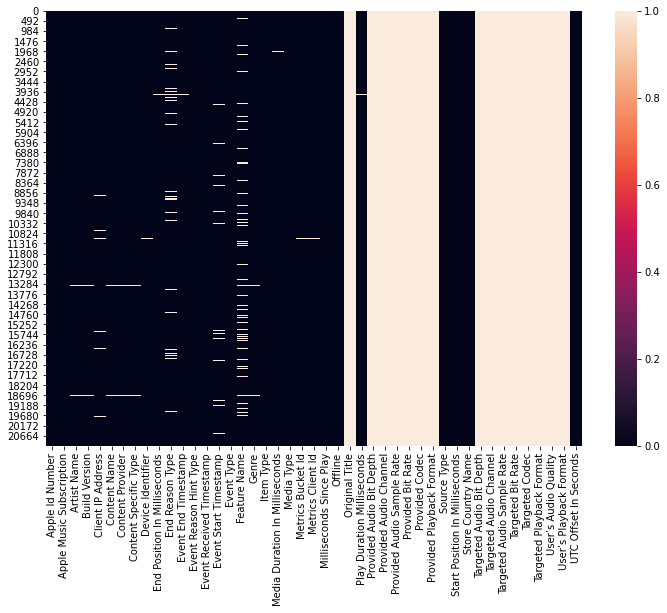

In [12]:
sns.heatmap(music_df.isnull())
plt.show()

Our DataFrame many columns which have all the NULL values. Such columns have to be removed from the dataset.  Our goal should be making the above HeatMap as dark as possible (i.e without any white marks)

In [13]:
nans = [col for col in music_df.columns if music_df[col].isnull().all()==True]

In [14]:
# drop the above columns from the dataframe
music_df.drop(nans, axis=1, inplace=True)

In [15]:
# check for current shape of df
music_df.shape

(21147, 30)

We have reduced our DataFrame columns from 45 cols -&gt; 30 cols

In [16]:
music_df.isnull().sum()

Apple Id Number                      0
Apple Music Subscription             0
Artist Name                         63
Build Version                       28
Client IP Address                  352
Content Name                        56
Content Provider                    75
Content Specific Type               59
Device Identifier                   83
End Position In Milliseconds        75
End Reason Type                   1009
Event End Timestamp                 75
Event Reason Hint Type               0
Event Received Timestamp             0
Event Start Timestamp              592
Event Type                           0
Feature Name                      2237
Genre                               75
Item Type                            0
Media Duration In Milliseconds      87
Media Type                           1
Metrics Bucket Id                   83
Metrics Client Id                   83
Milliseconds Since Play              0
Offline                              0
Play Duration Millisecond

There are more columns like ID's which are not going to contribute much in our analysis. So we will drop these columns as well manually

In [17]:
to_delete = ['Apple Id Number', 'Build Version', 'Client IP Address', 'Device Identifier', 'Metrics Bucket Id', 'Metrics Client Id', 'UTC Offset In Seconds', 'Store Country Name']
music_df.drop(to_delete, axis=1, inplace=True)

In [18]:
music_df.isnull().sum()

Apple Music Subscription             0
Artist Name                         63
Content Name                        56
Content Provider                    75
Content Specific Type               59
End Position In Milliseconds        75
End Reason Type                   1009
Event End Timestamp                 75
Event Reason Hint Type               0
Event Received Timestamp             0
Event Start Timestamp              592
Event Type                           0
Feature Name                      2237
Genre                               75
Item Type                            0
Media Duration In Milliseconds      87
Media Type                           1
Milliseconds Since Play              0
Offline                              0
Play Duration Milliseconds          75
Source Type                          0
Start Position In Milliseconds       0
dtype: int64

In [19]:
music_df.shape

(21147, 22)

### Converting timestamp columns to actual TimeStamp

Timestamp columns - Event End Timestamp, Event Start Timestamp, Event Received Timestamp are not exactly timestamp but string. We have to convert these columns into actual timestamps

In [20]:
music_df['Event End Timestamp'] = pd.to_datetime(music_df['Event End Timestamp'], format='%Y-%m-%dT%H:%M:%S')
music_df['Event Received Timestamp'] = pd.to_datetime(music_df['Event Received Timestamp'], format='%Y-%m-%dT%H:%M:%S')
music_df['Event Start Timestamp'] = pd.to_datetime(music_df['Event Start Timestamp'], format='%Y-%m-%dT%H:%M:%S')

In [21]:
music_df.head()

,Apple Music Subscription,Artist Name,Content Name,Content Provider,Content Specific Type,End Position In Milliseconds,End Reason Type,Event End Timestamp,Event Reason Hint Type,Event Received Timestamp,Event Start Timestamp,Event Type,Feature Name,Genre,Item Type,Media Duration In Milliseconds,Media Type,Milliseconds Since Play,Offline,Play Duration Milliseconds,Source Type,Start Position In Milliseconds
0,True,Bazzi,Paradise,The Warner Music Group,Song,3312.0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,2019-06-28 16:46:33.382000+00:00,NOT_SPECIFIED,2019-06-28 17:21:01.944000+00:00,2019-06-28 16:46:30.070000+00:00,PLAY_END,library / downloaded_music / songs,Pop,ITUNES_STORE_CONTENT,169087.0,AUDIO,2068562,True,3312.0,ORIGINATING_DEVICE,0
1,True,Raftaar,Aage Chal,Hungama Digital Media Entertainment Pvt.,Song,131214.0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,2020-06-18 15:29:01.975000+00:00,NOT_SPECIFIED,2020-06-21 04:13:37.975000+00:00,2020-06-18 15:26:50.761000+00:00,PLAY_END,library,Indian Pop,ITUNES_STORE_CONTENT,229800.0,AUDIO,218676000,False,131214.0,ORIGINATING_DEVICE,0
2,True,"Master Rakesh, Dr Zeus",Kangna (feat. Deepti & Shortie),The Orchard Enterprises Inc.,Song,0.0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,2019-08-27 13:22:00.883000+00:00,NOT_SPECIFIED,2019-08-27 13:22:05.551000+00:00,2019-08-27 13:22:00.883000+00:00,PLAY_END,library / album_detail,Asia,ITUNES_STORE_CONTENT,209118.0,AUDIO,4668,False,0.0,ORIGINATING_DEVICE,0
3,True,The Weeknd,Can't Feel My Face,Universal Music International,Song,31027.0,SCRUB_BEGIN,2018-04-03 18:15:01.395000+00:00,NOT_SPECIFIED,2018-04-03 18:15:14.359000+00:00,2018-04-03 18:15:00.362000+00:00,PLAY_END,library / downloaded_music / songs,R&B/Soul,ITUNES_STORE_CONTENT,213577.0,AUDIO,12964,False,1033.0,ORIGINATING_DEVICE,29994
4,True,"Nucleya, DIVINE","Paintra (From ""Mukkabaaz"")",Eros International USA Inc,Song,119958.0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,2017-12-20 12:42:47.599000+00:00,NOT_SPECIFIED,2017-12-20 12:42:47.771000+00:00,2017-12-20 12:41:25.722000+00:00,PLAY_END,library / album_detail,Bollywood,ITUNES_STORE_CONTENT,232222.0,AUDIO,172,False,81877.0,ORIGINATING_DEVICE,38081


## Data Analysis

Questions to ask for data analysis

1. Who are the top 10 favourite artists?
2. Which are the top 10 songs played?
3. Who are top 10 favourite content providers or music labels?
4. Which are the top 10 songs that were listened for longest time?
5. What is the reason of ending the song most?
6. Which are your most loved genre?
7. Which media type do you prefer most on Apple Music?
8. Do you prefer listening to music when you are online/offline?
9. What time do you prefer to listen music?
10. Which was the most active month?
11. Which was the most active year?
12. Total time spent on the platform?

### 1. Who are your top 10 favourite artists/singers/band?

In [22]:
top_10_artist = music_df['Artist Name'].value_counts()[:10]

In [23]:
fig = px.bar(top_10_artist, title="Top 10 favourite artists", labels={"index":"Artists", 'value':"No. of times song played"}, color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

### 2. Which are the top 20 songs played? (favourite songs)

In [24]:
top_20_songs = music_df['Content Name'].value_counts()[:20]

In [25]:
# (optional)
# changing the name of longest song name
as_list = top_20_songs.index.tolist()
idx = as_list.index("I'm the One (feat. Justin Bieber, Quavo, Chance the Rapper & Lil Wayne)")
as_list[idx] = 'I am the one (ft. Justin Bieber)'
top_20_songs.index = as_list

In [26]:
fig = px.bar(top_20_songs, title="Top 20 favourite songs", labels={"index":"Songs", 'value':"No. of times song played"}, color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_xaxes(tickangle=22)
fig.show()

### 3. Which are the top 10 favourite content providers?

In [27]:
top_10_labels = music_df['Content Provider'].value_counts()[:10]

In [28]:
# (optional)
# changing the name of longest label name
as_list = top_10_labels.index.tolist()
idx = as_list.index("Super Cassettes Industries Pvt Limited a.k.a. T-Series")
as_list[idx] = 'T-Series'
top_10_labels.index = as_list

In [29]:
fig = px.bar(top_10_labels, title="Top 20 favourite labels", labels={"index":"Music Labels", 'value':"No. of times song label played"}, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_xaxes(tickangle=25)
fig.show()

What are the top songs played from particular label?

In [30]:
def top_10_song_of_label(label):
    """
    Function to see what are the top musics played from particular label. 
    """
    # use groupby method and sort ascending
    label_df = music_df[music_df['Content Provider'] == label]
    top_10_song = label_df['Content Name'].value_counts()[:10]
    print(top_10_song)
    fig = px.bar(top_10_song, labels={"index": "Song Names", "value": "No. of time song played", "variable":"Song name"}, title=f"Top songs from {label}")
    fig.show()

In [31]:
top_10_song_of_label('The Warner Music Group')

In [32]:
top_10_song_of_label('Super Cassettes Industries Pvt Limited a.k.a. T-Series')

Ishq Tera              66
Chota Sa Fasana        60
Maahi Ve               59
High Rated Gabru       50
Tu Chale               45
Tera Yaar Hoon Main    45
Befikra                41
Duniyaa                40
Chalte Chalte          40
Tose Naina             40
Name: Content Name, dtype: int64


### 4. Which are the top 10 songs that were listened for longest time? 

In [33]:
top_longest_played = music_df.groupby('Content Name')['Play Duration Milliseconds'].sum().sort_values(ascending=False)

In [34]:
# Converting milliseconds to minutes
top_longest_played = top_longest_played / 60000

In [35]:
colors = px.colors.qualitative

In [36]:
fig = px.bar(top_longest_played[:10], labels={"Content Name": "Song Names", "value": "Play Time (in mins)", "variable":"Duration"}, color_discrete_sequence=colors.G10_r)
fig.show()

### 5.  What is the reason of ending the song most?

In [37]:
music_df['End Reason Type'].value_counts()

MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM    5177
NATURAL_END_OF_TRACK                         4180
TRACK_SKIPPED_FORWARDS                       3803
PLAYBACK_MANUALLY_PAUSED                     3517
SCRUB_END                                    1386
SCRUB_BEGIN                                  1384
FAILED_TO_LOAD                                314
TRACK_SKIPPED_BACKWARDS                       294
NOT_APPLICABLE                                 48
PLAYBACK_SUSPENDED                             24
EXITED_APPLICATION                              9
OTHER                                           2
Name: End Reason Type, dtype: int64

In [38]:
fig = px.pie(music_df, names='End Reason Type', color_discrete_sequence=colors.Set3)
fig.show()

I don't usually listen to full songs 😂

### 6. Which are your most loved genre?

In [39]:
top_genre = music_df.Genre.value_counts()[:10]

In [40]:
fig = px.bar(top_genre, color_discrete_sequence=colors.T10_r)
fig.show()

### 7. Which media type do you prefer most on Apple Music?

In [41]:
fig = px.pie(music_df, names='Media Type', color_discrete_sequence=colors.Dark2, title="Most preferable Media Type (eg. Audio/Video)")
fig.show()

### 8. Do you prefer listening to music when you are online/offline?

In [42]:
music_df.Offline.value_counts()

False    13140
True      8007
Name: Offline, dtype: int64

In [43]:
fig = px.pie(music_df, names="Offline", title="Do you prefer listening to music Offline?")
fig.show()

Yeah!! A Lot. Around 38% of the time, I like listening to songs when I am offline. Most probably, I close my eyes and feel the music. 

### 9. What time do you prefer to listen to music?

In [44]:
music_df['Event Start Timestamp']

0       2019-06-28 16:46:30.070000+00:00
1       2020-06-18 15:26:50.761000+00:00
2       2019-08-27 13:22:00.883000+00:00
3       2018-04-03 18:15:00.362000+00:00
4       2017-12-20 12:41:25.722000+00:00
                      ...               
21142   2019-04-04 11:35:22.521000+00:00
21143   2017-12-14 16:30:51.889000+00:00
21144   2017-11-22 20:13:01.197000+00:00
21145   2018-05-08 21:06:18.318000+00:00
21146   2020-03-07 08:14:02.793000+00:00
Name: Event Start Timestamp, Length: 21147, dtype: datetime64[ns, UTC]

In [45]:
# converting event start timestamp to separate time section
music_df["Event Start Time"] = music_df['Event Start Timestamp'].dt.time
music_df["Event Start Time"].head()

0    16:46:30.070000
1    15:26:50.761000
2    13:22:00.883000
3    18:15:00.362000
4    12:41:25.722000
Name: Event Start Time, dtype: object

In [46]:
hours = music_df["Event Start Time"].groupby(music_df["Event Start Timestamp"].dt.hour).count()

In [47]:
fig = px.bar(hours, title="Most active hours (24hr)", labels={"value": "count", "Event Start Timestamp":"Timings (hours)"}, color_discrete_sequence=colors.Prism)
fig.update_xaxes(dtick=1)
fig.show()

Looks like I can hear music at any time from above graph. HAHA!! 

### 10. What month have you listened to songs most?

In [48]:
months = music_df["Event Start Time"].groupby(music_df["Event Start Timestamp"].dt.month).count()

In [59]:
m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov','Dec']
fig = px.bar(months, title="Most active Months", text=m, labels={"value": "count", "Event Start Timestamp":"Months"}, color_discrete_sequence=colors.Light24)
fig.update_xaxes(dtick=1)
fig.show()

### 11. Which year have you listened to songs most on Apple Music?

In [50]:
years = music_df["Event Start Time"].groupby(music_df["Event Start Timestamp"].dt.year).count()

In [51]:
fig = px.bar(years, title="Most active years", labels={"value": "count", "Event Start Timestamp":"Year"}, color_discrete_sequence=colors.Prism_r)
fig.update_xaxes(dtick=1)
fig.show()

### 12. Total time spent listening to&nbsp;music

In [52]:
total_time = music_df['Play Duration Milliseconds'].sum()

In [53]:
total_mins = total_time/60000
print("Total minutes spent: {:.2f} mins".format(total_mins))
total_hours = total_mins/60
print("Total hours spent: {:.2f} hours".format(total_hours))

Total minutes spent: 24568.91 mins
Total hours spent: 409.48 hours


In [54]:
start_time = music_df['Event End Timestamp'].min()
end_time = music_df['Event End Timestamp'].max()

In [55]:
total_possible_time = (end_time - start_time).days

In [56]:
total_possible_hours = total_possible_time * 24
print("Total possible time could be spent: {:.2f} hours".format(total_possible_hours))

Total possible time could be spent: 31632.00 hours


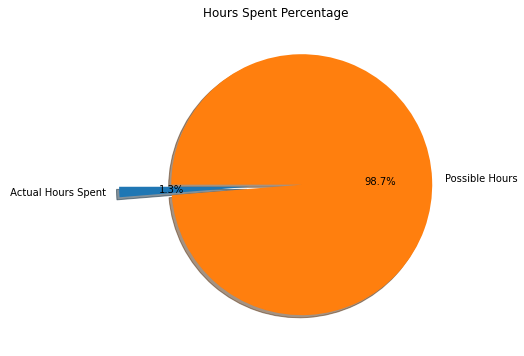

In [57]:
hours_spent_list = np.array([total_hours, total_possible_hours])
hours_spent_list_labels = [" Actual Hours Spent", "Possible Hours"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(hours_spent_list, labels= hours_spent_list_labels, autopct='%1.1f%%',  explode=[0.2,0.2], startangle=180, shadow = True);
plt.title("Hours Spent Percentage");

### Daily average songs played

In [58]:
total_songs = music_df.shape[0]
print("Daily average of songs played: {:.2f} songs".format(total_songs/total_possible_time))

Daily average of songs played: 16.04 songs


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4597a1b6-de90-4f9a-b59d-60c2ea6c17ad' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>